# Customize Your Models with TensorFlow2

In [ ]:
# This snippet must be executed.
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# To make sure that you can access the data, please execute the following code as well.
!unzip -q data.zip

## Get Started with the Keras Functional API

### The Keras Funcitonal API
- [Input](https://www.tensorflow.org/api_docs/python/tf/keras/Input)
- [Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model)
- [RMSprop](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/RMSprop)
- [plot_model](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model)

In [ ]:
from sklearn.model_selection import train_test_split
# Load the tutorial built-in dataset
data = pd.read_csv('data/diagnosis.csv')
print(data.shape)
data = data.to_numpy()

(120, 8)


In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[:,:6], data[:, 6:], test_size=.33)
temp_train, nocc_train, lump_train, urps_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lump_test, urps_test, mict_test, bis_test = np.transpose(X_test)

# Get the dual labels
inflam_train, nephr_train = y_train[:, 0], y_train[:, 1]
inflam_test, nephr_test = y_test[:, 0], y_test[:, 1]

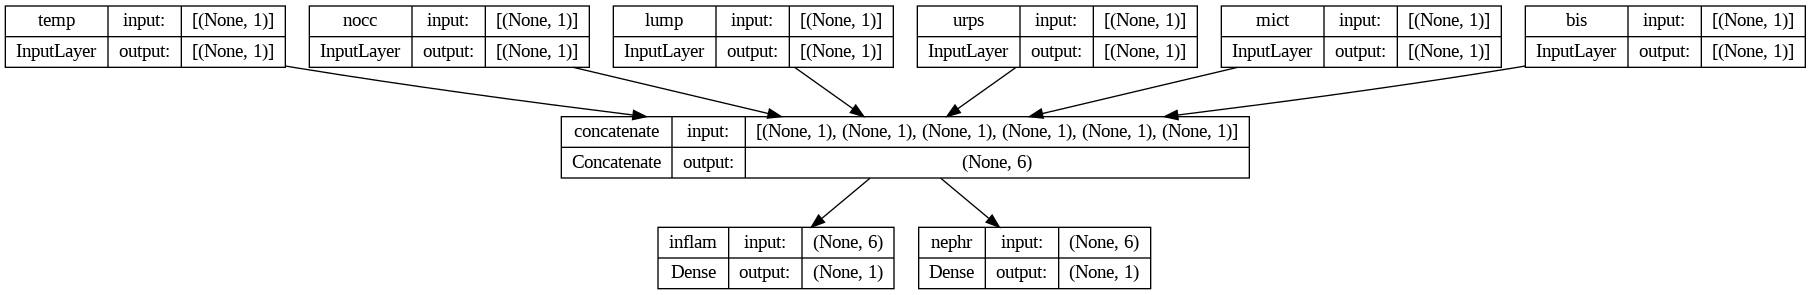

In [ ]:
# Import necessary modules from TensorFlow.Keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import concatenate, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

# Define the input layers for each feature
temp = Input(shape=(1, ), name='temp') # temperature
nocc = Input(shape=(1, ), name='nocc') # nausea occurence
lump = Input(shape=(1, ), name='lump') # lumbar pain
urps = Input(shape=(1, ), name='urps') # urine pushing
mict = Input(shape=(1, ), name='mict') # micturition pains
bis = Input(shape=(1, ), name='bis') # bis

# Concatenate the input layers
inputs = [temp, nocc, lump, urps, mict, bis]
x = concatenate(inputs)

# Define the output layers
inflam = Dense(1, activation='sigmoid', name='inflam')(x) # inflamation
nephr = Dense(1, activation='sigmoid', name='nephr')(x) # nephritis
# Concatenate the output layers
outputs = [inflam, nephr]

# Define the model using the Keras functional API
model = Model(inputs=inputs, outputs=outputs)

# Plot the model using the Keras built-in utility
plot_model(model, 'model.png', show_shapes=True)

In [ ]:
# Compile the model
model.compile(
    optimizer=RMSprop(1e-3),
    # Define the loss functions for each output
    loss={'inflam': 'binary_crossentropy', 'nephr': 'binary_crossentropy'},
    # Equivalent to loss = ['binary_crossentropy', 'binary_crossentropy']
    # Define the metrics for each output
    metrics=[['acc'], ['acc']],
    # Equivalent to metrics = {'inflam': ['acc'], 'nephr': ['acc']}
    # Assign different weights to the losses
    loss_weights=[1., .2]
)

In [ ]:
# Define the dictionary of inputs and outputs
inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lump': lump_train,
                'urps': urps_train, 'mict': mict_train, 'bis': bis_train}
outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}
# Train the model
history = model.fit(inputs_train, outputs_train,
                    epochs=1000, batch_size=128,
                    verbose=0)

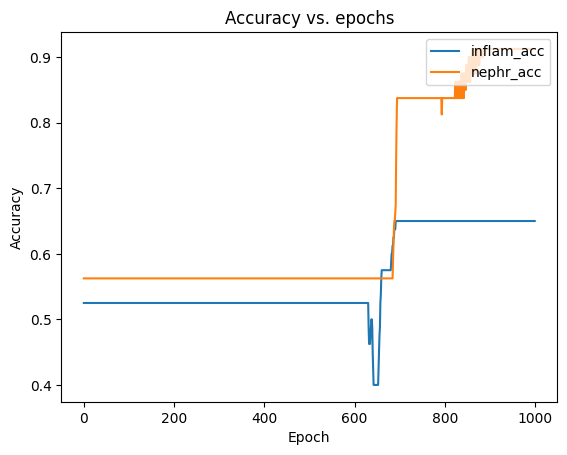

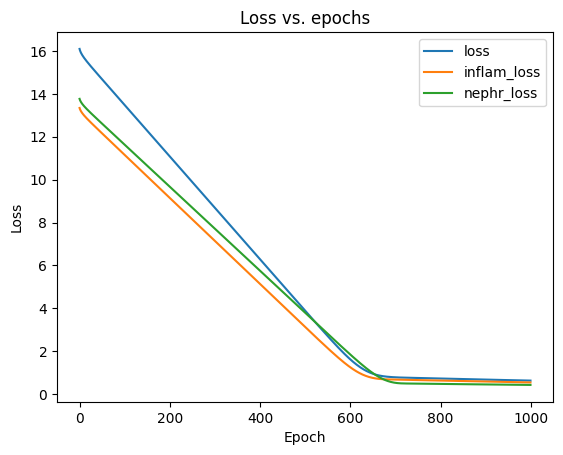

In [ ]:
# Plot the training history
acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')]
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [ ]:
# Evaluate the model
model.evaluate([temp_test, nocc_test, lump_test, urps_test, mict_test, bis_test],
               [inflam_test, nephr_test], verbose=2)

2/2 - 0s - loss: 0.6291 - inflam_loss: 0.5422 - nephr_loss: 0.4345 - inflam_acc: 0.6750 - nephr_acc: 0.9250 - 424ms/epoch - 212ms/step


[0.6291221976280212,
 0.5422191619873047,
 0.4345155358314514,
 0.675000011920929,
 0.925000011920929]

### Variables and Tensors
- [tf.Variable](https://www.tensorflow.org/api_docs/python/tf/Variable)
- [tf.constant](https://www.tensorflow.org/api_docs/python/tf/constant)
- [tf.reshape](https://www.tensorflow.org/api_docs/python/tf/reshape)
- [tf.ones](https://www.tensorflow.org/api_docs/python/tf/ones)
- [tf.zeros](https://www.tensorflow.org/api_docs/python/tf/zeros)
- [tf.eye](https://www.tensorflow.org/api_docs/python/tf/eye)
- [tf.rank](https://www.tensorflow.org/api_docs/python/tf/rank)
- [tf.concat](https://www.tensorflow.org/api_docs/python/tf/concat)
- [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims)
- [tf.random.normal](https://www.tensorflow.org/api_docs/python/tf/random/normal)

In [ ]:
# In this section, we will learn what tensors are and how to create them.
tf_string = tf.Variable(['Hello World'], tf.string) # Create a string tensor
tf_floats = tf.Variable([3.14, 9.11], tf.float64) # Create a float tensor
tf_ints = tf.Variable([1, 9, 4, 9], tf.int32) # Create an integer tensor
tf_complex = tf.Variable([1.2 - 3.4, 5.6 - 7.8], tf.complex128) # Create a complex tensor

In [ ]:
# Create a tensor with a constant value and a specific shape
tf.Variable(tf.constant(3.14, shape=(2, 3)))

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14]], dtype=float32)>

In [ ]:
# Add an integer to a tensor
i = tf.Variable(1.2)
j = i + 1
print(type(j))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
# Or equivalently using the .assign_add() method
i.assign_add(1)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.2>

In [ ]:
# Similarly, we can subtract a value from a tensor
i.assign_sub(1)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1.2>

In [ ]:
x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
(3, 3)
<dtype: 'int32'>


In [ ]:
# We can also convert a tensor to a NumPy array
x.numpy()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [ ]:
# Although we are using a list of lists of integers, we can also force the tensor to have a specific data type
x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=tf.float32)
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)
(3, 3)
<dtype: 'float32'>


In [ ]:
# We can also create a tensor from a NumPy array and define its shape
a = np.arange(16)
b = tf.constant(a, shape=(8, 2))
c = tf.constant(a, shape=(4, 4))
d = tf.constant(a, shape=(2, 2, 2, 2))

In [ ]:
print(a)
print(b)
print(c)
print(d)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)
tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)
tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]], shape=(2, 2, 2, 2), dtype=int64)


In [ ]:
tensor = tf.constant(np.arange(80), shape=[5, 2, 8])
# We can get the rank of a tensor using the tf.rank() function
rank = tf.rank(tensor)
print(rank)

tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
# Similar to NumPy, we can change the shape of a tensor using the tf.reshape() function
tensor_reshaped = tf.reshape(tensor, shape=[8, 10])
tensor_reshaped.shape

TensorShape([8, 10])

In [ ]:
# We can create some special tensors.
ones = tf.ones(shape=(2, 3))
zeros = tf.zeros(shape=(3, 2))
eye = tf.eye(3)

In [ ]:
print(ones)
print(zeros)
print(eye)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [ ]:
t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))
# We can concatenate two tensors along a specific axis
concat0 = tf.concat([t1, t2], 0)
concat1 = tf.concat([t1, t2], 1)

print(concat0, concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32) tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [ ]:
tensor = tf.constant(np.arange(24), shape=(3, 2, 4))
# We can also expand the dimensions of a tensor along a specific axis
tensor0 = tf.expand_dims(tensor, 0)
tensor1 = tf.expand_dims(tensor, 1)
tensor3 = tf.expand_dims(tensor, 3)

print(tensor0.shape)
print(tensor1.shape)
print(tensor3.shape)

(1, 3, 2, 4)
(3, 1, 2, 4)
(3, 2, 4, 1)


In [ ]:
a = tf.constant(np.arange(24))
# We can slice a tensor like lists or NumPy arrays
a[1:8]

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([1, 2, 3, 4, 5, 6, 7])>

In [ ]:
b = tf.constant([[1.0, 2.0], [3.0, 4.0]])
c = tf.constant([[1.0, 1.0], [0.0, 1.0]])
# We can perform matrix multiplication using the tf.matmul() function
matmul = tf.matmul(b, c)
matmul

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 3.],
       [3., 7.]], dtype=float32)>

In [ ]:
# We can also perform element-wise operations
b_plus_c = b + c
b_minus_c = b - c
b_times_c = b * c
print(b_plus_c)
print(b_minus_c)
print(b_times_c)

tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)


In [ ]:
# We can create some random tensors
tensor_random = tf.random.normal(shape=(4, 4), mean=0.0, stddev=1.0)
tensor_random

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[ 2.6439598 ,  0.15666126, -1.2231216 ,  1.824368  ],
       [-0.52138275,  0.23273957,  0.5899127 , -0.90822333],
       [-1.4949535 , -0.5264444 ,  1.5858282 , -0.22134097],
       [-0.11075827,  0.61608756, -1.2769861 ,  0.56293327]],
      dtype=float32)>

### Access Model Layers
- [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)
- [tf.keras.preprocessing.image](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image)

In [ ]:
# Load the pre-trained VGG19 model
from tensorflow.keras.applications import VGG19

vggnet = VGG19()
# Print the model summary
vggnet.summary()

574710816/574710816 [==============================] - 7s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Get the layers and inputs of the VGG19 model
vgg_layers = vggnet.layers
vgg_inputs = vggnet.input
# Get the outputs of each layer from the VGG19 model layers
layer_outputs = [layer.output for layer in vgg_layers]
# We would like to extract features using VGG19
features = Model(inputs=vgg_inputs, outputs=layer_outputs)

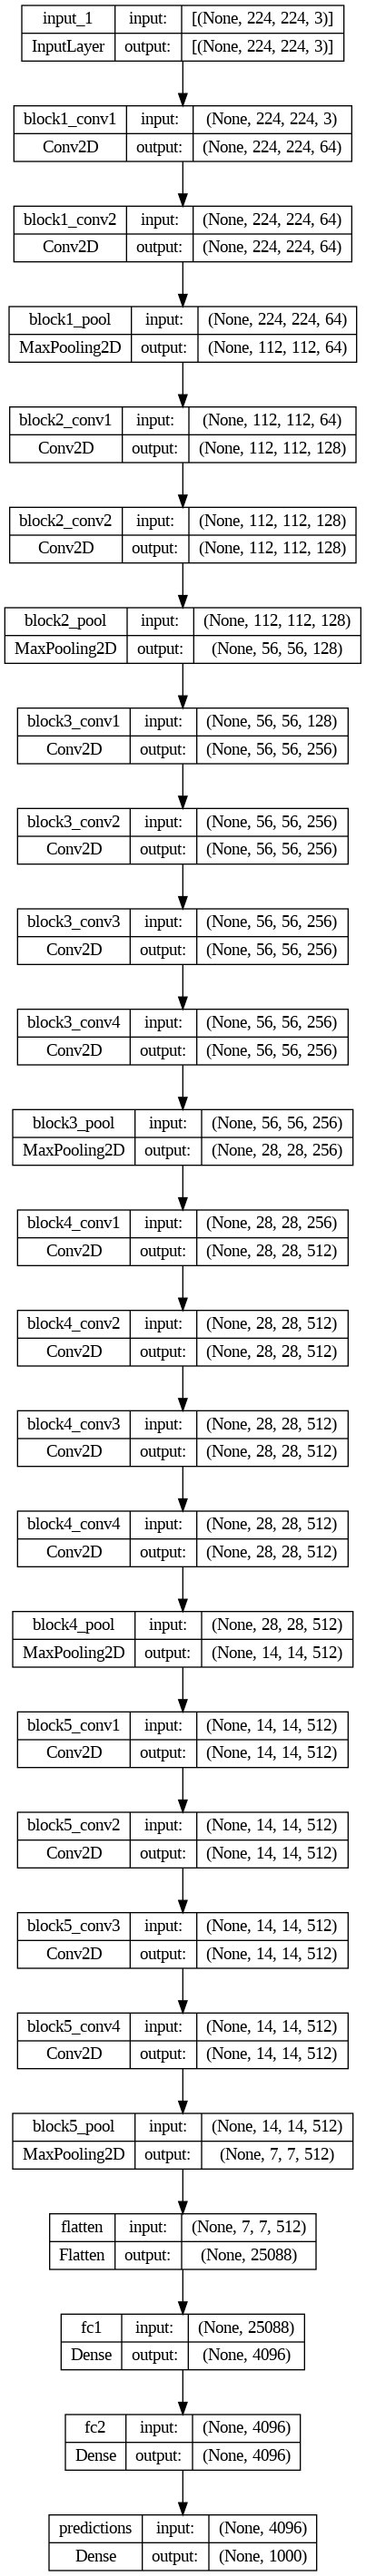

In [ ]:
# Plot the model
plot_model(features, 'vgg19.png', show_shapes=True)

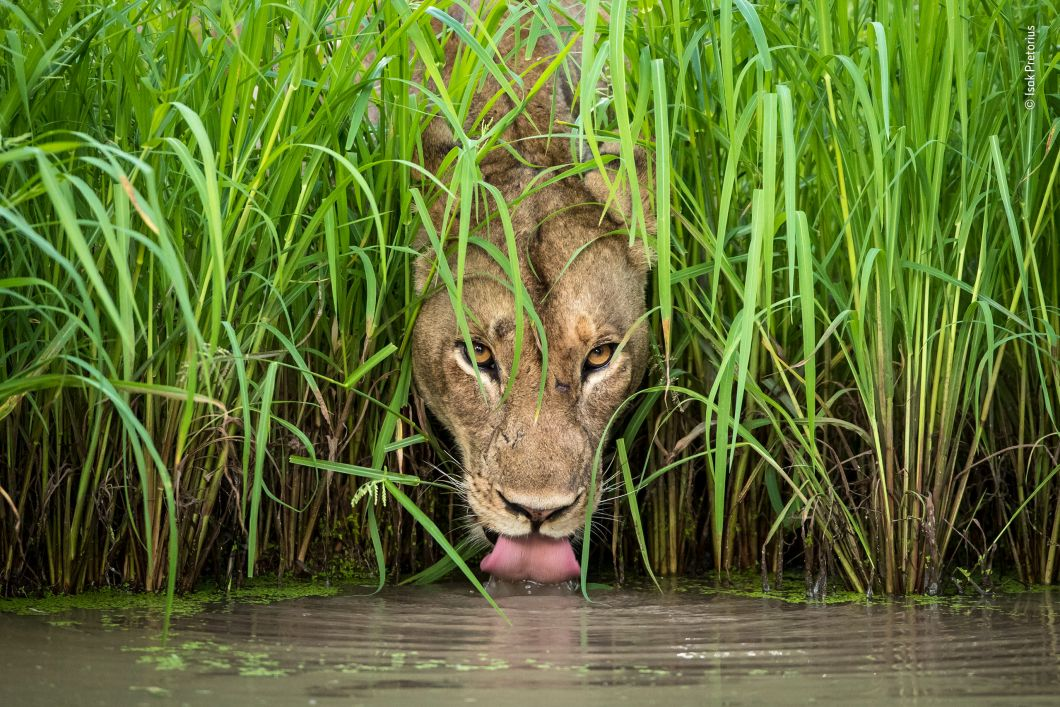

In [ ]:
import IPython.display as display
from PIL import Image
# Display the image from our built-in dataset
display.display(Image.open('data/cool_cat.jpg'))

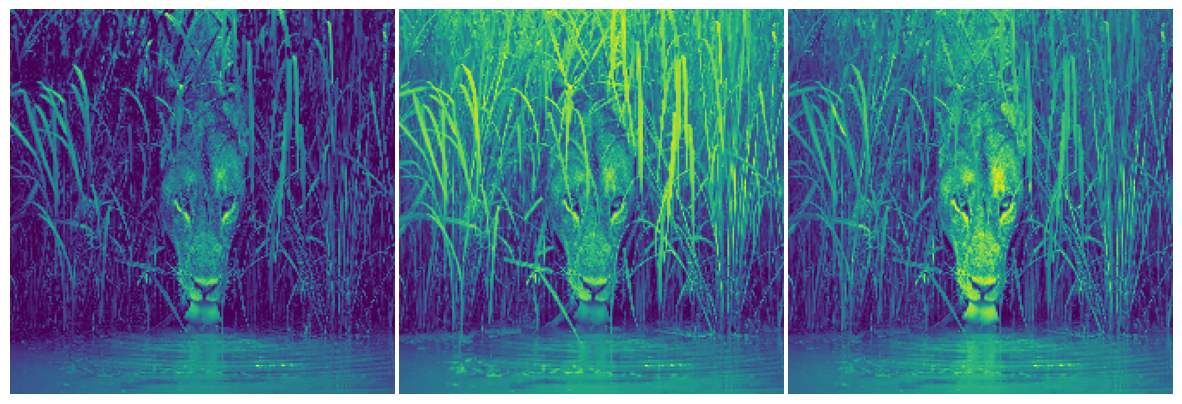

In [ ]:
# Import preprocessing function from Keras
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = 'data/cool_cat.jpg'
# Load the image with the target size of 224x224
img = image.load_img(img_path, target_size=(224, 224))
# Convert the image to a NumPy array
x = image.img_to_array(img)
# Expand the dimensions of the image
x = np.expand_dims(x, axis=0)
# Preprocess the input image
x = preprocess_input(x)
# Extract features using the VGG19 model
ftrs = features(x)
# Get the first set of features
ftrs_0 = ftrs[0]
imgs = ftrs_0[0, :, :]
# Visualize the first set of features
plt.figure(figsize=(15, 15))
for n in range(3):
    ax = plt.subplot(1, 3, n+1)
    plt.imshow(imgs[:, :, n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

1/1 [==============================] - 0s 195ms/step


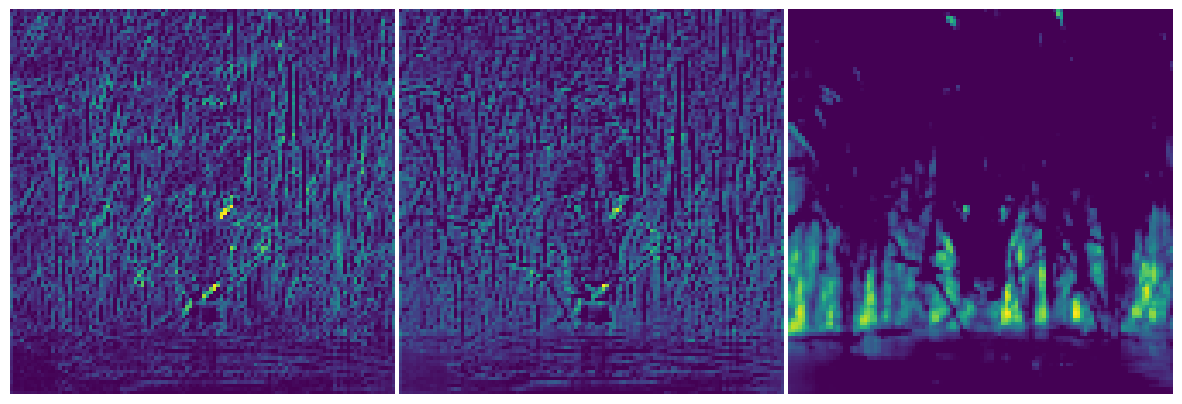

In [ ]:
# Get the features from the block1_pool layer
block1_pool = Model(inputs=features.input, outputs=features.get_layer('block1_pool').output)
ftrs_block1_pool = block1_pool.predict(x)
# Get the first set of features of the block1_pool layer
imgs = ftrs_block1_pool[0, :, :]
# Visualize the first set of features
plt.figure(figsize=(15, 15))
for n in range(3):
    ax = plt.subplot(1, 3, n+1)
    plt.imshow(imgs[:, :, n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

1/1 [==============================] - 1s 731ms/step


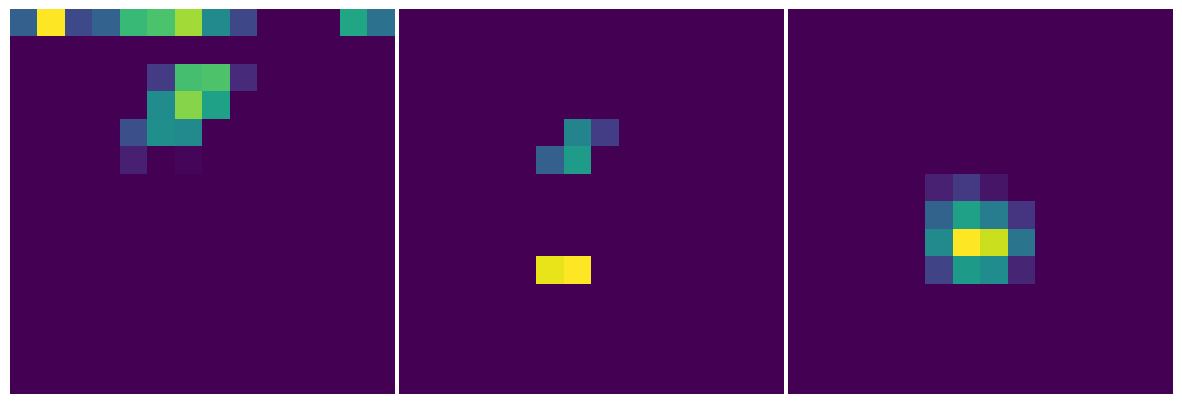

In [ ]:
# Similarly, we can get the features from the block5_conv4 layer
block5_conv4 = Model(inputs=features.input, outputs=features.get_layer('block5_conv4').output)
# Extract features using the block5_conv4 model
ftrs_block5_conv4 = block5_conv4.predict(x)
imgs = ftrs_block5_conv4[0, :, :]
plt.figure(figsize=(15, 15))
for n in range(3):
    ax = plt.subplot(1, 3, n+1)
    plt.imshow(imgs[:, :, n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)
# We can find that the features extracted from the block5_conv4 layer are more abstract than those from the block1_pool layer.

### Freeze Layers

In [ ]:
# Import necessary modules from TensorFlow.Keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
# Build a simple sequential model
model = Sequential([
    Dense(4, input_shape=(4, ), activation='relu',
          kernel_initializer='random_uniform', bias_initializer='ones', name='input_layer'),
    Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones', name='hidden_layer'),
    Dense(4, activation='softmax', name='output_layer'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 4)                 20        
                                                                 
 hidden_layer (Dense)        (None, 2)                 10        
                                                                 
 output_layer (Dense)        (None, 4)                 12        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define helper functions
# Get the weights of the model
def get_weights(model):
    return [layer.weights[0].numpy() for layer in model.layers]

# Plot the variation of weights between two models
def plot_weights_var(W_0, W_1):
    plt.figure(figsize=(8, 8))
    num_layers = len(W_0)
    for i in range(num_layers):
        delta = W_1[i] - W_0[i]
        ax = plt.subplot(1, num_layers, i+1)
        plt.imshow(delta)
        plt.title(f'Layer {i}')
        plt.axis('off')
    plt.colorbar()
    plt.suptitle('Weights variation')

# Count the number of trainable and non-trainable parameters
def trainable_counts(model):
    return len(model.trainable_variables), len(model.non_trainable_variables)

In [ ]:
# Count the number of trainable and non-trainable variables
train, non_train = trainable_counts(model)
print(f'Number of trainable variables: {train}; number of non-trainable variables: {non_train}.')

Number of trainable variables: 6; number of non-trainable variables: 0.


In [ ]:
# Get the weights of the model
W_0 = get_weights(model)

In [ ]:
# Generate some random data to test the effect of freezing layers
X_train = np.random.random((100, 4))
y_train = X_train
X_test = np.random.random((20, 4))
y_test = X_test

In [ ]:
# Compile and train the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['acc']
)
model.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
# Get the weights of the model after training
W_1 = get_weights(model)

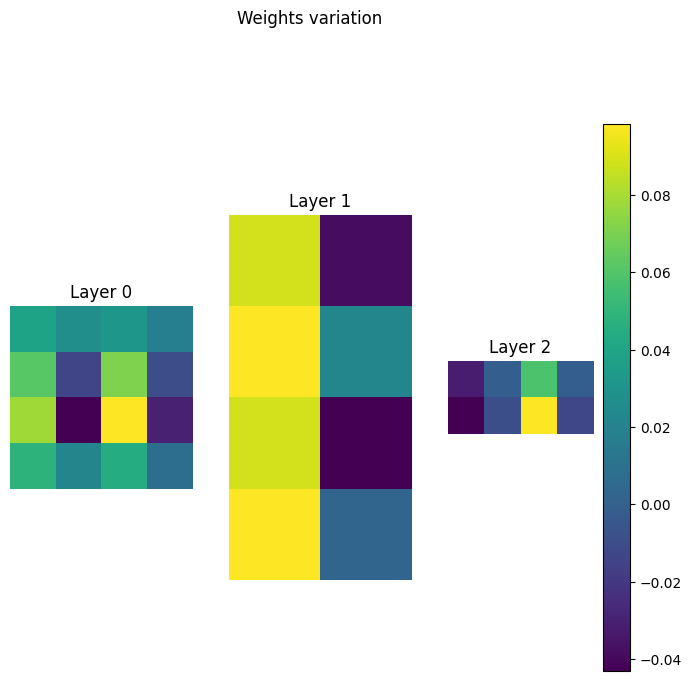

In [ ]:
# Visualize the weights variation
plot_weights_var(W_0, W_1)

In [ ]:
# Then, we freeze the first layer
model_freezed = Sequential([
    Dense(4, input_shape=(4, ), activation='relu',
          kernel_initializer='random_uniform', bias_initializer='ones', name='input_layer', trainable=False),
    Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones', name='hidden_layer'),
    Dense(4, activation='softmax', name='output_layer'),
])

In [ ]:
# Check again the number of trainable and non-trainable variables
train, non_train = trainable_counts(model_freezed)
print(f'Number of trainable variables: {train}; number of non-trainable variables: {non_train}.')

Number of trainable variables: 4; number of non-trainable variables: 2.


In [ ]:
# This freezing operation is equivalent to setting the trainable attribute of the first layer to False
model.layers[0].trainable = False
train, non_train = trainable_counts(model)
# It will print the same results.
print(f'Number of trainable variables: {train}; number of non-trainable variables: {non_train}.')

Number of trainable variables: 4; number of non-trainable variables: 2.


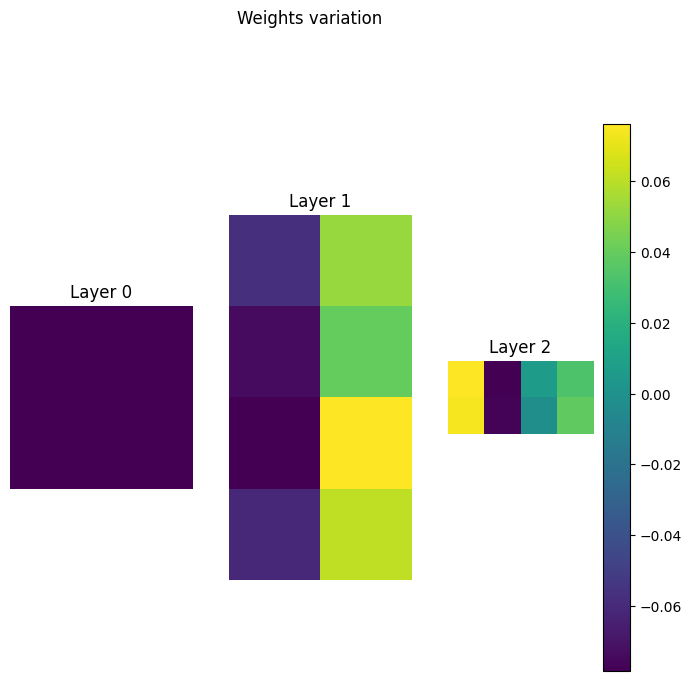

In [ ]:
# Compile and train the model again
W_0 = get_weights(model_freezed)

model_freezed.compile(
    optimizer='adam',
    loss='mse',
    metrics=['acc']
)
model_freezed.fit(X_train, y_train, epochs=50, verbose=0)
W_1 = get_weights(model_freezed)
# Visualize the weights variation
plot_weights_var(W_0, W_1)
# We can find that the weights of the first layer are not changed.

## Data Pipeline

### Keras Datasets

#### CIFAR-100
- [CIFAR-100](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100)

In [ ]:
# Load CIFAR-100 dataset from Keras
from tensorflow.keras.datasets import cifar100

(images_train, labels_train), (images_test, labels_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 10s 0us/step


In [ ]:
# Check the shape of the training and test sets
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
import json
# Load the label names from the built-in JSON file
with open('data/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

motorcycle


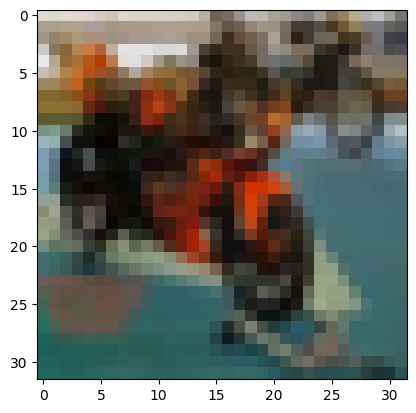

In [ ]:
# Randomly select an image from the training set
i = np.random.randint(0, images_train.shape[0])
plt.imshow(images_train[i])
print(cifar100_fine_labels[labels_train[i][0]])

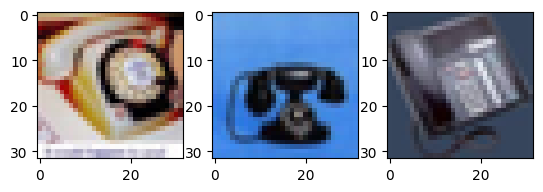

In [ ]:
# Choose the first three images of number 86
examples = images_train[(labels_train.T == 86)[0]][:3]
fig, ax = plt.subplots(1, 3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [ ]:
# Load the coare labels of CIFAR-100 dataset
# It won't download again
(images_train, labels_train), (images_test, labels_test) = cifar100.load_data(label_mode='coarse')

In [ ]:
# Similarly, we can load the label names from the built-in JSON file
with open('data/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

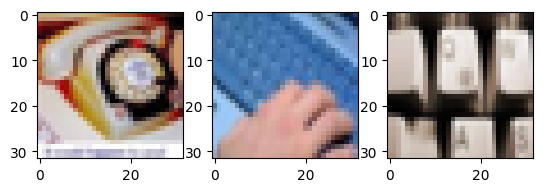

In [ ]:
# Choose the first three images of number 5
examples = images_train[(labels_train.T == 5)[0]][:3]
fig, ax = plt.subplots(1, 3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])
# You can find that the first image is the same as the first image of number 86 in the previous section.
# Also, you might know why the label mode is called coarse.

In [ ]:
# Specifically, we can check their detailed labels.
print(cifar100_fine_labels[86])
print(cifar100_coarse_labels[5])

telephone
household electrical device


#### IMDB
- [IMDB](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb)

In [ ]:
# Different from the image datasets, now we will learn how to load text datasets.
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (teset_data, test_labels) = imdb.load_data()

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
# Check the first training sample
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
# Check the maximum and minimum length of the training samples
seq_lens = [len(seq) for seq in train_data]
print(np.max(seq_lens))
print(np.min(seq_lens))

2494
11


In [ ]:
# We can pass some arguments to the load_data() function
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(skip_top=50, oov_char=2) # Out-of-value character
seq_lens = [len(seq) for seq in train_data]
print(np.max(seq_lens))
print(np.min(seq_lens))

2494
11


In [ ]:
# We can delete the word with index 2 from the training samples
train_data = [[word for word in sample if word != 2] for sample in train_data]
seq_lens = [len(seq) for seq in train_data]
print(np.max(seq_lens))
print(np.min(seq_lens))

1648
3


### Data Generators

In [ ]:
# Here, we will use the tutorial built-in dataset and define the column names first.
headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('data/fertility_diagnosis.txt', delimiter=',', header=None, names=headers)
fertility.shape

(100, 10)

In [ ]:
# Check the first five samples
fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [ ]:
# Do some basic preprocessing
fertility['Output'] = fertility['Output'].map(lambda x: 0.0 if x == 'N' else 1.0)
fertility = fertility.astype('float32')
fertility = fertility.sample(frac=1).reset_index(drop=True)
fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])
fertility.columns = [col for col in fertility.columns if col != 'Output'] + ['Output']
fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.78,1.0,0.0,0.0,0.0,1.0,1.0,0.06,0.0,0,0,1,0
1,0.58,0.0,0.0,0.0,1.0,0.8,1.0,0.44,0.0,0,0,0,1
2,0.67,1.0,1.0,0.0,-1.0,0.8,0.0,0.31,0.0,0,0,0,1
3,0.58,1.0,1.0,1.0,0.0,0.8,0.0,0.44,0.0,0,0,0,1
4,0.58,1.0,0.0,1.0,-1.0,0.8,1.0,0.50,0.0,1,0,0,0


In [ ]:
# Convert the Pandas DataFrame to NumPy arrays
fertility = fertility.to_numpy()

In [ ]:
# Define the training and validation sets
train_data = fertility[:70]
valid_data = fertility[70:]
# Split the training and validation sets into features and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]
X_valid = valid_data[:, :-1]
y_valid = valid_data[:, -1]

# Define a data generator which yields a batch of data each time
def data_gen(X, y, batch_size=1):
    for n in range(int(len(X)/batch_size)):
        yield (X[n*batch_size: (n+1)*batch_size], y[n*batch_size: (n+1)*batch_size])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define a simple model using the Keras functional API
inputs = Input((12, ))
x = BatchNormalization(momentum=0.8)(inputs)
x = Dense(100, activation='relu')(x)
x = BatchNormalization(momentum=0.8)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 batch_normalization (Batch  (None, 12)                48        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 100)               1300      
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1849 (7.22 KB)
Trainable params: 1625 (6.35 KB)

In [ ]:
# Compile the model
optimizer = Adam(learning_rate=1e-2)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define the batch size and the number of training steps
batch_size = 5
train_steps = len(train_data) // batch_size
epochs = 3
for epoch in range(epochs):
    train_gen = data_gen(X_train, y_train, batch_size=batch_size)
    valid_gen = data_gen(X_valid, y_valid, batch_size=30)
    # We can use the fit_generator() function to train the model
    model.fit_generator(train_gen, steps_per_epoch=train_steps,
                        validation_data=valid_gen, validation_steps=1)

<ipython-input-40-cdd79029c926>:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen, steps_per_epoch=train_steps,


14/14 [==============================] - 0s 10ms/step - loss: 0.0978 - accuracy: 0.9714 - val_loss: 0.0439 - val_accuracy: 1.0000


In [ ]:
# However, the data generator defined above is not cyclic.
# In other words, it will stop when the number of batches reaches the maximum.
# To make the data generator cyclic, we can use the following code.
def data_gen_cyclic(X, y, batch_size=1):
    while True:
        for n in range(int(len(X)/batch_size)):
            start_idx = n*batch_size
            end_idx = (n+1)*batch_size
            yield (X[start_idx:end_idx], y[start_idx:end_idx])
        permuted = np.random.permutation(len(X))
        X = X[permuted]
        y = y[permuted]

In [ ]:
train_gen = data_gen_cyclic(X_train, y_train, batch_size=batch_size)
valid_gen = data_gen_cyclic(X_valid, y_valid, batch_size=batch_size)
model.fit_generator(train_gen, steps_per_epoch=train_steps,
                    validation_data=valid_gen, validation_steps=1, epochs=3)

Epoch 1/3
12/14 [========================>.....] - ETA: 0s - loss: 0.0741 - accuracy: 0.9833

<ipython-input-42-d2b6b9778f92>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen, steps_per_epoch=train_steps,


14/14 [==============================] - 0s 13ms/step - loss: 0.0643 - accuracy: 0.9857 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 2/3
14/14 [==============================] - 0s 8ms/step - loss: 0.1418 - accuracy: 0.9429 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3/3
14/14 [==============================] - 0s 7ms/step - loss: 0.0627 - accuracy: 0.9857 - val_loss: 0.0065 - val_accuracy: 1.0000


### Image Data Augmentation
- [CIFAR-10](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10)
- [to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)
- [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [ ]:
# Import necessary modules
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load the CIFAR-10 dataset
(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# Convert the labels to one-hot encoded vectors
num_classes = 10
labels_train = to_categorical(labels_train, num_classes)
labels_test = to_categorical(labels_test, num_classes)

In [ ]:
# Define the data generator
def data_gen(X, y, batch_size=1):
    for n in range(int(len(X)/batch_size)):
        start_idx = n * batch_size
        end_idx = (n + 1) * batch_size
        yield (X[start_idx:end_idx], y[start_idx:end_idx])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


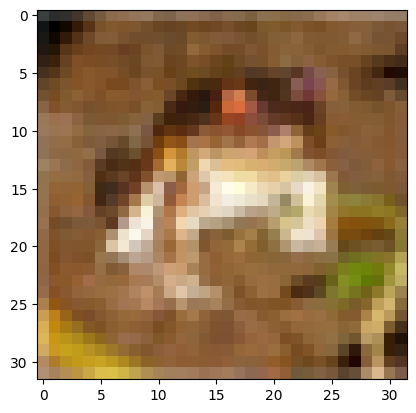

In [ ]:
# Check the first training sample
train_gen = data_gen(images_train, labels_train)
image, label = next(train_gen)
plt.imshow(image[0, :, :, :])
print(label)

In [ ]:
# Define a transformation function
def grey_scale(x):
    helper = lambda a: [np.mean(a)] * 3
    x = np.apply_along_axis(helper, -1, x)
    return x

In [ ]:
# Create an image generator using ImageDataGenerator
image_gen = ImageDataGenerator(
    preprocessing_function=grey_scale, # Pass the transformation function
    rotation_range=180,
    rescale=(1/255.0)
)
# Fit the image generator
image_gen.fit(images_train)

Text(0.5, 1.0, 'Grey-scale')

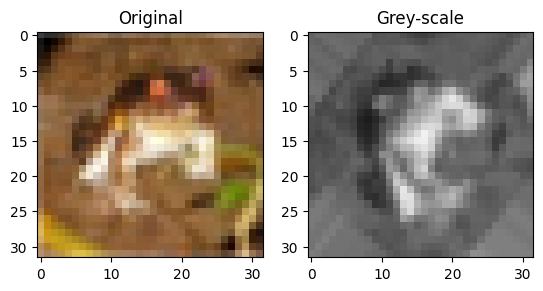

In [ ]:
# Create an image data iterator using .flow() method
image_gen_iter = image_gen.flow(images_train, labels_train, batch_size=1, shuffle=False)
train_gen = data_gen(images_train, labels_train)
# Define the image and label from the image data iterator
image_aug, label_aug = next(image_gen_iter)
image_raw, label_raw = next(train_gen)
figs, axes = plt.subplots(1, 2)
# Compare the original and augmented images
axes[0].imshow(image_raw[0, :, :, :])
axes[0].set_title('Original')
axes[1].imshow(image_aug[0, :, :, :])
axes[1].set_title('Grey-scale')

### The Dataset Class

#### Image Dataset
- [Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)
- [mnist](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist)

In [ ]:
from tensorflow.data import Dataset
from tensorflow.keras.datasets import mnist

In [ ]:
# Create a NumPy array
x1 = np.zeros((100, 10, 2, 2))
# Create a dataset from a NumPy array using Dataset.from_tensor_slices()
dataset1 = Dataset.from_tensor_slices(x1)
print(dataset1)
# We can use .element_spec to check the type of the dataset
print(dataset1.element_spec)

<_TensorSliceDataset element_spec=TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)>
TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)


In [ ]:
# How about two NumPy arrays with different shapes?
x2 = [np.zeros((10, 2, 2)), np.zeros((5, 2, 2))]
try:
    # Because the shapes of the two NumPy arrays are different, it will raise an error.
    dataset2 = Dataset.from_tensor_slices(x2)
except:
    # The error message will be printed.
    print("The elements have different shapes.")

The elements have different shapes.


In [ ]:
# When the shapes of the NumPy arrays are the same, we can create a dataset from them.
x3 = [np.zeros((10, 1)), np.zeros((10, 1)), np.zeros((10, 1))]
dataset3 = Dataset.from_tensor_slices(x3)
print(dataset3.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


In [ ]:
# We can use the .zip() method to zip two datasets
dataset_zipped = Dataset.zip((dataset1, dataset3))
# We can check the type of the zipped dataset
print(dataset_zipped.element_spec)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [ ]:
# We can compute the length of the dataset
iter_dataset = iter(dataset_zipped)
i = 0
try:
    while next(iter_dataset):
        i += 1
except:
    print(i)

3


In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check the shape of the training and test sets
print(type(X_train))
print(X_train.shape)
print(type(y_train))
print(y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)


In [ ]:
# Create a dataset from the MNIST dataset
mnist_dataset = Dataset.from_tensor_slices((X_train, y_train))
print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [ ]:
# Use the .take() method to get the first element of the dataset
element = next(iter(mnist_dataset.take(1)))
# We can find there are two elements in the dataset
# One is the image and the other is the label
print(len(element))
# The shape of the image is (28, 28)
print(element[0].shape)
# The label is a scalar
print(element[1].shape)

2
(28, 28)
()


#### Text Dataset
- [TextLineDataset](https://www.tensorflow.org/api_docs/python/tf/data/TextLineDataset)

In [ ]:
from tensorflow.data import TextLineDataset

In [ ]:
# Use the text line dataset to load the Shakespeare dataset
text_files = sorted([f.path for f in os.scandir('data/shakespeare')])
print(text_files)

['data/shakespeare/tempest.1.1.txt', 'data/shakespeare/tempest.1.2.txt', 'data/shakespeare/tempest.2.1.txt', 'data/shakespeare/tempest.2.2.txt', 'data/shakespeare/tempest.3.1.txt', 'data/shakespeare/tempest.3.2.txt', 'data/shakespeare/tempest.3.3.txt', 'data/shakespeare/tempest.4.1.txt', 'data/shakespeare/tempest.5.1.txt']


In [ ]:
# Print the first five lines of the first text file
with open(text_files[0], 'r') as file:
    contents = [file.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. On a ship at sea: a tempestuous noise

of thunder and lightning heard.

Enter a Master and a Boatswain



Master



In [ ]:
# Use the text files to create a dataset
shakespeare_dataset = TextLineDataset(text_files)
# Get the first five lines of the dataset
first_5_lines_dataset = iter(shakespeare_dataset.take(5))
# Print the first five lines of the dataset
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [ ]:
# Compute the number of lines in the first file
lines = []
with open(text_files[0], 'r') as file:
    line = file.readline()
    while line:
        lines.append(line)
        line = file.readline()
    print(len(lines))

121


In [ ]:
# Compute the number of lines in the shakespeare dataset
shakespeare_dataset_iter = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iter]
print(len(lines))

3134


In [ ]:
# Use .from_tensor_slices() method to create a dataset from a list of text files
text_files_dataset = Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'data/shakespeare/tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.3.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.4.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.5.1.txt', shape=(), dtype=string)


In [ ]:
# Use the .interleave() method to create a dataset from a list of text file
shakespeare_dataset_interleaved = text_files_dataset.interleave(TextLineDataset, cycle_length=9)
print(shakespeare_dataset_interleaved.element_spec)

TensorSpec(shape=(), dtype=tf.string, name=None)


In [ ]:
lines = [line for line in iter(shakespeare_dataset_interleaved.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


### Training with Datasets

In [ ]:
# Import necessary modules
from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

In [ ]:
# Load the tutorial built-in dataset
bank = pd.read_csv('data/bank/bank-full.csv', delimiter=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank.shape

(45211, 17)

In [ ]:
features = [
    'age', 'job', 'marital', 'education', 'default', 'balance',
    'housing', 'loan', 'contact', 'campaign', 'pdays', 'poutcome'
]
labels = ['y']
bank = bank.filter(features + labels)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


In [ ]:
# Convert the categorical features to one-hot encoded vectors
encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank[feature] = tuple(encoder.fit_transform(bank[feature]))

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",married,"[0, 0, 1, 0]",[0],2143,[1],[0],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no
1,44,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",single,"[0, 1, 0, 0]",[0],29,[1],[0],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no
2,33,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",married,"[0, 1, 0, 0]",[0],2,[1],[1],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no
3,47,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",married,"[0, 0, 0, 1]",[0],1506,[1],[0],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no
4,33,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",single,"[0, 0, 0, 1]",[0],1,[0],[0],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no


In [ ]:
# Shuffle the dataset
bank = bank.sample(frac=1).reset_index(drop=True)

In [ ]:
# Convert the Pandas DataFrame to tf.data.Dataset
bank_dataset = Dataset.from_tensor_slices(bank.to_dict(orient='list'))
print(bank_dataset.element_spec)

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None), 'job': TensorSpec(shape=(12,), dtype=tf.int64, name=None), 'marital': TensorSpec(shape=(), dtype=tf.string, name=None), 'education': TensorSpec(shape=(4,), dtype=tf.int64, name=None), 'default': TensorSpec(shape=(1,), dtype=tf.int64, name=None), 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None), 'housing': TensorSpec(shape=(1,), dtype=tf.int64, name=None), 'loan': TensorSpec(shape=(1,), dtype=tf.int64, name=None), 'contact': TensorSpec(shape=(3,), dtype=tf.int64, name=None), 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None), 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None), 'poutcome': TensorSpec(shape=(4,), dtype=tf.int64, name=None), 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}


In [ ]:
# Check if a person is divorced or not
def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')
# In the original data, there is a person who is not divorced.
check_divorced()

Found a person with marital status: b'married'


In [ ]:
# Filter out the people with marital status married
bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0])
check_divorced()

No non-divorced people were found!


In [ ]:
# Define a function to preprocess the labels
def map_label(x):
    x['y'] = 0 if (x['y'] == tf.constant([b'no'], dtype=tf.string)) else 1
    return x

# Apply the function to the dataset
bank_dataset = bank_dataset.map(map_label)
print(bank_dataset.element_spec['y'])

TensorSpec(shape=(), dtype=tf.int32, name=None)


In [ ]:
# Filter out the feature 'marital'
bank_dataset = bank_dataset.map(lambda x: {key: value for key, value in x.items() if key != 'marital'})

print('marital' in bank_dataset.element_spec)

False


In [ ]:
# Define a function to preprocess the features and labels
def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [ ]:
# Apply the function to the dataset to get the final dataset
# The final dataset contains the features and labels
bank_dataset = bank_dataset.map(map_feature_label)
print(bank_dataset.element_spec)

(TensorSpec(shape=(30,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))


In [ ]:
# Compute the length of the dataset
dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

5207


In [ ]:
# Split the dataset into training and validation sets
# using the take() and skip() methods
train_set = bank_dataset.take(int(dataset_length * 0.7))
valid_set = bank_dataset.skip(int(dataset_length * 0.7))

In [ ]:
# Define a simple model using the Keras Sequential API
model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

# Compile the mode
optimizer = Adam(1e-4)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 30)                120       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 400)               12400     
                                                                 
 batch_normalization_1 (Bat  (None, 400)               1600      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 batch_normalization_2 (Bat  (None, 400)               1600      
 chNormalization)                                                
                                                        

In [ ]:
# Set the batch size and drop the last batch
train_set = train_set.batch(20, drop_remainder=True)
# Shuffle the training set
train_set = train_set.shuffle(1000)
# Set the batch size of the validation set
valid_set = valid_set.batch(100)
# Train the model
history = model.fit(train_set, validation_data=valid_set, epochs=5)

Epoch 1/5
182/182 [==============================] - 10s 19ms/step - loss: 0.6625 - accuracy: 0.6376 - val_loss: 0.6020 - val_accuracy: 0.7441
Epoch 2/5
182/182 [==============================] - 4s 17ms/step - loss: 0.4774 - accuracy: 0.8335 - val_loss: 0.5204 - val_accuracy: 0.8145
Epoch 3/5
182/182 [==============================] - 6s 25ms/step - loss: 0.3706 - accuracy: 0.8986 - val_loss: 0.4954 - val_accuracy: 0.8125
Epoch 4/5
182/182 [==============================] - 5s 21ms/step - loss: 0.2977 - accuracy: 0.9250 - val_loss: 0.4758 - val_accuracy: 0.8247
Epoch 5/5
182/182 [==============================] - 5s 21ms/step - loss: 0.2524 - accuracy: 0.9269 - val_loss: 0.4149 - val_accuracy: 0.8567


Text(0, 0.5, 'Accuracy')

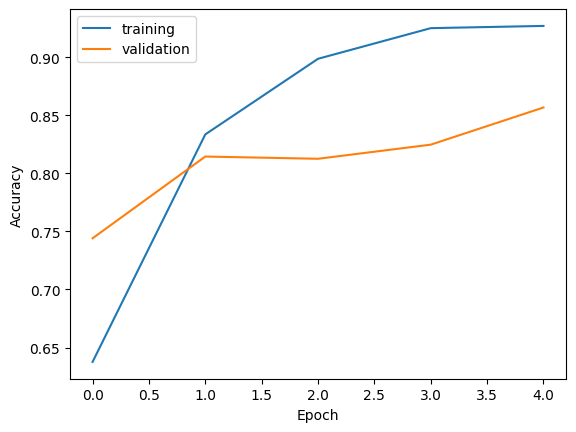

In [ ]:
# Visualize the training history
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

## Sequence Modeling

In [ ]:
# We can check whether the GPU is available
tf.test.gpu_device_name()

'/device:GPU:0'

### Processing Sequence Data
- [Masking](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Masking)
- [pad_sequences](https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences)

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

# Check the shape of the training set
print(type(X_train))
print(X_train.shape)

17464789/17464789 [==============================] - 2s 0us/step
<class 'numpy.ndarray'>
(25000,)


In [ ]:
# Lots of arguments can be passed to the load_data() function
(a, b), (c, d) = imdb.load_data(path='imdb.npz',
                            index_from=3,
                            num_words=1000,
                            skip_top=10,
                            oov_char=2,
                            maxlen=500,
                            start_char=1)

In [ ]:
# Get the word index
imdb_word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 1s 1us/step


In [ ]:
index_from = 3
imdb_word_index = {key: value + index_from for key, value in imdb_word_index.items()}
# Check the index of the word 'the'
imdb_word_index['the']

4

In [ ]:
# Create an inverse word index
inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
# Get the first 10 words of the first review
[inv_imdb_word_index[index] for index in X_train[0] if index > index_from][:10]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction']

In [ ]:
# We can pad the sequences using the pad_sequences() function
# Also, we can set the maximum length of the sequences, the padding type, and the truncation type
X_train_padded = pad_sequences(X_train,
                               maxlen=300,
                               padding='pre',
                               truncating='post')
X_train_padded.shape

(25000, 300)

In [ ]:
# Add a dimension to the tensor
X_train_padded = np.expand_dims(X_train_padded, -1)
# Convert the NumPy array to a tensor
X_train_tensor = tf.convert_to_tensor(X_train_padded, dtype='float32')
# Create a masking layer
masking_layer = Masking(mask_value=0.0)
# Apply the masking layer to the tensor
X_train_masked = masking_layer(X_train_tensor)

In [ ]:
X_train_tensor[0]

<tf.Tensor: shape=(300, 1), dtype=float32, numpy=
array([[0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
     

In [ ]:
X_train_masked[0]

<tf.Tensor: shape=(300, 1), dtype=float32, numpy=
array([[0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
     

In [ ]:
# Get the mask of the tensor 
X_train_masked._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])>

### Embeddings
- [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)
- [GlobalAveragePooling1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D)

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
# Create an embedding layer
embedding_layer = Embedding(input_dim=501, output_dim=16)

In [ ]:
# Pass the tensor to the embedding layer
sequence_indices = tf.constant([[0], [1], [5], [500]])
sequence_embeddings = embedding_layer(sequence_indices)
sequence_embeddings

<tf.Tensor: shape=(4, 1, 16), dtype=float32, numpy=
array([[[-0.02168182,  0.03628891,  0.02871278, -0.01840214,
         -0.04100329,  0.00039706, -0.02952615, -0.00357667,
          0.01343013,  0.03743998, -0.04248983,  0.01394605,
         -0.036076  , -0.00895295,  0.00745164, -0.02874416]],

       [[ 0.0437284 , -0.02292231,  0.01248912,  0.02095467,
          0.02733966,  0.01899597, -0.02118329,  0.00087881,
         -0.0308573 , -0.02352209, -0.04758555, -0.03462462,
         -0.03908827,  0.03489104,  0.00074972,  0.0200128 ]],

       [[ 0.04101953, -0.006946  , -0.01531689,  0.01976   ,
          0.01091462, -0.00546736,  0.04450649, -0.03444408,
         -0.00428612, -0.01241881,  0.00452343, -0.04565841,
         -0.01033686,  0.03997338, -0.00816858,  0.02650671]],

       [[-0.04591359, -0.01918699,  0.02341155,  0.03033895,
         -0.04188225,  0.0109323 , -0.03417589, -0.01720048,
         -0.01385162,  0.00715137,  0.01192216,  0.03980802,
          0.01378255,  0

In [ ]:
# Get the weights of the embedding layer
embedding_layer.get_weights()[0]

array([[-0.02168182,  0.03628891,  0.02871278, ..., -0.00895295,
         0.00745164, -0.02874416],
       [ 0.0437284 , -0.02292231,  0.01248912, ...,  0.03489104,
         0.00074972,  0.0200128 ],
       [-0.02543609, -0.04333079,  0.01328728, ..., -0.03785551,
        -0.00678228,  0.02667699],
       ...,
       [ 0.03268426,  0.0039087 , -0.04524301, ...,  0.04973761,
         0.04801134, -0.00472673],
       [ 0.01095691,  0.04906788,  0.03077948, ..., -0.00723368,
        -0.0387521 , -0.01725512],
       [-0.04591359, -0.01918699,  0.02341155, ...,  0.01911998,
         0.0241628 ,  0.04987427]], dtype=float32)

In [ ]:
embedding_layer.get_weights()[0][14, :]

array([ 0.04820203, -0.02619353,  0.03144917,  0.02454763,  0.04658307,
       -0.01705224,  0.0256103 ,  0.04151069, -0.00119778, -0.04145417,
       -0.02403483,  0.04086021,  0.0042991 ,  0.00322562,  0.04747697,
       -0.03323694], dtype=float32)

In [ ]:
# Create a embedding layer with masking
embedding_layer_masking = Embedding(input_dim=501, output_dim=16, mask_zero=True)
sequence_embeddings_masked = embedding_layer_masking(sequence_indices)
# Get the mask of the tensor
sequence_embeddings_masked._keras_mask

<tf.Tensor: shape=(4, 1), dtype=bool, numpy=
array([[False],
       [ True],
       [ True],
       [ True]])>

In [ ]:
# Define two helper functions to load the IMDB dataset and get the word index
def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    # Load the reviews
    (X_train, y_train), (X_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    X_train = pad_sequences(X_train,
                            maxlen=None,
                            padding='pre',
                            truncating='pre',
                            value=0)

    X_test = pad_sequences(X_test,
                           maxlen=None,
                           padding='pre',
                           truncating='pre',
                           value=0)

    return (X_train, y_train), (X_test, y_test)

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
(X_train, y_train), (X_test, y_test) = get_and_pad_imdb_dataset()

In [ ]:
imdb_word_index = get_imdb_word_index()

In [ ]:
inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling1D, Dense

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

# Define a sequential model
model = Sequential([
    Embedding(input_dim= max_index_value+1, output_dim=embedding_dim, mask_zero=False),
    GlobalAveragePooling1D(),
    Dense(1, activation='sigmoid')
])

# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GlobalAveragePooling1D, Dense, Input
# inputs = Input((None, ))
# x = Embedding(input_dim= max_index_value+1, output_dim=embedding_dim, mask_zero=False)(inputs)
# x = GlobalAveragePooling1D()(x)
# outputs = Dense(1, activation='sigmoid')(x)
# model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          160016    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160033 (625.13 KB)
Trainable params: 160033 (625.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Complie and train the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), validation_steps=20)

Epoch 1/5
782/782 [==============================] - 91s 109ms/step - loss: 0.6910 - accuracy: 0.5394 - val_loss: 0.6868 - val_accuracy: 0.5641
Epoch 2/5
782/782 [==============================] - 47s 60ms/step - loss: 0.6747 - accuracy: 0.6830 - val_loss: 0.6569 - val_accuracy: 0.7312
Epoch 3/5
782/782 [==============================] - 26s 33ms/step - loss: 0.6329 - accuracy: 0.7543 - val_loss: 0.6054 - val_accuracy: 0.7609
Epoch 4/5
782/782 [==============================] - 14s 17ms/step - loss: 0.5804 - accuracy: 0.7919 - val_loss: 0.5550 - val_accuracy: 0.7844
Epoch 5/5
782/782 [==============================] - 13s 17ms/step - loss: 0.5302 - accuracy: 0.8134 - val_loss: 0.5145 - val_accuracy: 0.7844


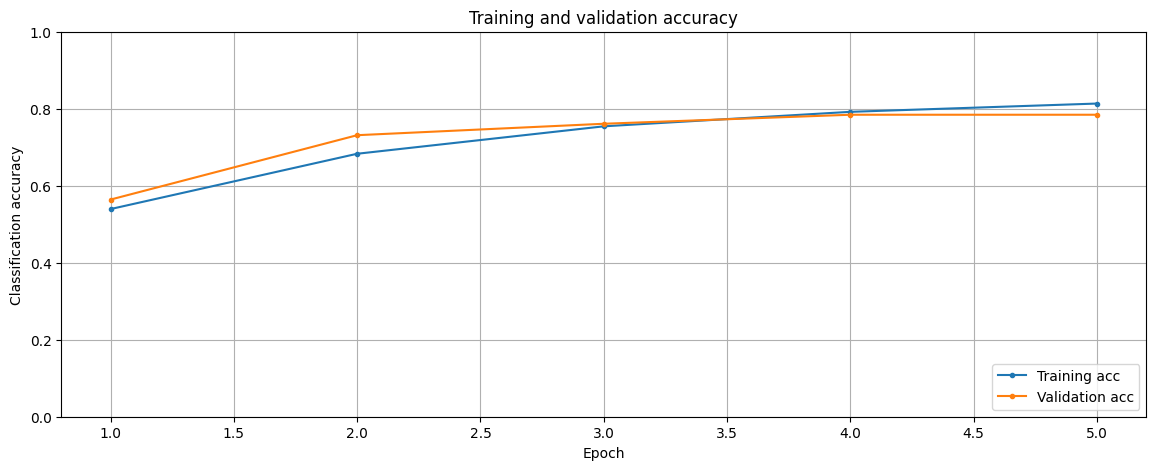

In [ ]:
# Visualize the training history
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0, 1)

[Tensorflow Embedding Projector](https://projector.tensorflow.org/)

In [ ]:
# We can get the weights of the embedding layer, which is the first layer of the model
# Then, we can write the weights to a file
# Click the link above and upload the file to visualize the embeddings
import io

weights = model.layers[0].get_weights()[0]
k = 0

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')

    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1

out_v.close()
out_m.close()

### Recurrent Neural Networks
- [SimpleRNN](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN)
- [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
- [GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU)

In [ ]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

In [ ]:
# Create a simple RNN layer
rnn = SimpleRNN(16)
# Create a random tensor
sequence = tf.constant([[[1., 1.], [2., 2.], [56., -100.]]])
# Pass the tensor to the RNN layer
output = rnn(sequence)
# Check the shape of the output tensor
output.shape

TensorShape([1, 16])

In [ ]:
(X_train, y_train), (X_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)
imdb_word_index = get_imdb_word_index()
max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [ ]:
# Create a sequential model using LSTM
model = Sequential([
    Embedding(input_dim= max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    LSTM(16),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
134/134 [==============================] - 158s 1s/step - loss: 0.6004 - accuracy: 0.6818
Epoch 2/3
134/134 [==============================] - 106s 792ms/step - loss: 0.3404 - accuracy: 0.8708
Epoch 3/3
134/134 [==============================] - 102s 763ms/step - loss: 0.2374 - accuracy: 0.9149


In [ ]:
# Get the prediction of the model
y_pred_0 = model.predict(X_test[None, 0, :])
y_test_0 = y_test[0]
print(y_pred_0)
print(y_test_0)

1/1 [==============================] - 2s 2s/step
[[0.25150567]]
0


### Stacked and Bidirectional RNNs
- [Bidirectional](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional)

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
# Load the IMDB dataset and get the word index
(X_train, y_train), (X_test, y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=250)
imdb_word_index = get_imdb_word_index(num_words=5000)
# Define the parameters of the model
max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [ ]:
# We can stack multiple RNN layers
stacked_rnn = Sequential([
    Embedding(input_dim= max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    LSTM(32, return_sequences=True), # Set return_sequences to True, which means the output of the LSTM layer is a sequence
    LSTM(32, return_sequences=False), # Set return_sequences to False, which means the output of the LSTM layer is a vector of the last time step
    Dense(1, activation='sigmoid')
])

In [ ]:
# Create a bidirectional RNN layer
bi_direction_rnn = Sequential([
    Embedding(input_dim= max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    Bidirectional(LSTM(8), merge_mode='sum'), # merge_mode: 'mul', 'concat', 'ave'
    Dense(1, activation='sigmoid')
])

In [ ]:
# Create a bidirectional RNN layer with two layers
bi_direction_rnn_2 = Sequential([
    Embedding(input_dim= max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    Bidirectional(LSTM(8), merge_mode='sum', # merge_mode: 'mul', 'concat', 'ave'
                  backward_layer=GRU(8, go_backwards=True)),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Create a stacked bidirectional RNN layer
stacked_bi_directional_rnn = Sequential([
    Embedding(input_dim= max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    Bidirectional(LSTM(8, return_sequences=True), merge_mode='concat'), # Concatenate the outputs of the forward and backward RNN layers
    GRU(8, return_sequences=False),
    Dense(1, activation='sigmoid')
])

## Model Subclassing and Custom Training Loops

### Model Subclassing

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Softmax, concatenate

In [ ]:
class MyModel(Model):
    def __init__(self):
        super().__init__()
        # Define the basic modules of the model
        self.dense_1 = Dense(64, activation='relu')
        self.dense_2 = Dense(10)

    def call(self, inputs):
        """
        Define the forward pass.
        """
        x = self.dense_1(inputs)
        out = self.dense_2(x)
        return out

In [ ]:
model = MyModel()
model(tf.random.uniform([1, 10])) # Pass a random tensor to the model before printing the model summary
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  704       
                                                                 
 dense_1 (Dense)             multiple                  650       
                                                                 
Total params: 1354 (5.29 KB)
Trainable params: 1354 (5.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
class MyModel(Model):
    def __init__(self):
        super().__init__()
        self.dense_1 = Dense(64, activation='relu')
        self.dense_2 = Dense(10)
        # Similarly, we can add the Dropout layer
        self.dropout = Dropout(0.4)

    def call(self, inputs, training=True):
        x = self.dense_1(inputs)
        x = self.dropout(x, training=training)
        out = self.dense_2(x)
        return out

In [ ]:
model = MyModel()
model(tf.random.uniform([1, 10]))
model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             multiple                  704       
                                                                 
 dense_3 (Dense)             multiple                  650       
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
Total params: 1354 (5.29 KB)
Trainable params: 1354 (5.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
class MyModel(Model):
    def __init__(self):
        super().__init__()
        self.dense_1 = Dense(64, activation='relu')
        self.dense_2 = Dense(10)
        self.dense_3 = Dense(5)
        self.softmax = Softmax()

    def call(self, inputs):
        x1 = self.dense_1(inputs)
        x2 = self.dense_2(inputs)
        x3 = self.dense_3(x2)
        # Instead of building the model in the sequential way, we can concatenate the outputs of the dense_1 and dense_3 layers
        concat = concatenate([x1, x3])
        out = self.softmax(concat)
        return out

### Custom Layers
- [Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Softmax

In [ ]:
class MyLayer(Layer):
    def __init__(self, input_dim, units):
        super().__init__()
        # Define the weights and the bias of the layer
        self.w = self.add_weight(shape=(input_dim, units),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(units, ),
                                 initializer='zeros')

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [ ]:
layer = MyLayer(5, 3) # A linear layer with input dimension 5 and output dimension 3
x = tf.ones((1, 5))
print(layer(x))
print(layer.weights)

tf.Tensor([[ 0.15004322 -0.07034026  0.12898481]], shape=(1, 3), dtype=float32)
[<tf.Variable 'Variable:0' shape=(5, 3) dtype=float32, numpy=
array([[-0.0310258 , -0.00720148,  0.03091937],
       [ 0.04405679, -0.05943545, -0.02057114],
       [ 0.04646664,  0.04418449,  0.07796836],
       [ 0.08548234, -0.04323081,  0.03129322],
       [ 0.00506324, -0.004657  ,  0.00937499]], dtype=float32)>, <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]


In [ ]:
print(f'Trainable weights: {len(layer.trainable_weights)}.')
print(f'Non-trainable weights: {len(layer.non_trainable_weights)}.')

Trainable weights: 2.
Non-trainable weights: 0.


In [ ]:
class MyLayer(Layer):
    def __init__(self, input_dim, units):
        super().__init__()
        self.w = self.add_weight(shape=(input_dim, units),
                                 initializer='random_normal',
                                 trainable=False) # Set the trainable attribute to False
        self.b = self.add_weight(shape=(units, ),
                                 initializer='zeros',
                                 trainable=False)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


In [ ]:
layer = MyLayer(5, 3) # Create a linear layer with input dimension 5 and output dimension 3 as before
# However, the weights of the layer are not trainable now
print(f'Trainable weights: {len(layer.trainable_weights)}.')
print(f'Non-trainable weights: {len(layer.non_trainable_weights)}.')

Trainable weights: 0.
Non-trainable weights: 2.


In [ ]:
class MyMeanLayer(Layer):
    def __init__(self, input_dim, units):
        super().__init__()
        self.w = self.add_weight(shape=(input_dim, units),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(units, ),
                                 initializer='zeros')
        self.sum_z = tf.Variable(initial_value=tf.zeros((units, )), trainable=False)
        self.num_call = tf.Variable(initial_value=0, trainable=False)

    def call(self, inputs):
        # Compute the outputs and the mean of the outputs of the layer
        z = tf.matmul(inputs, self.w) + self.b
        self.sum_z.assign_add(tf.reduce_sum(z, axis=0))
        self.num_call.assign_add(inputs.shape[0])
        return z, self.sum_z / tf.cast(self.num_call, tf.float32)

In [ ]:
layer = MyMeanLayer(5, 3)
z, means = layer(tf.ones((1, 5)))
print(means.numpy())

[-0.01395861  0.12957858 -0.03878839]


In [ ]:
# We can also customize a Dropout layer
class MyDropout(Layer):
    def __init__(self, rate=0.5):
        super().__init__()
        self.rate = rate

    def call(self, inputs):
        return tf.nn.dropout(inputs, rate=self.rate)

In [ ]:
# Construct a model using the customized layers
class MyModel(Model):
    def __init__(self, input_dim, units_1, units_2, units_3):
        super().__init__()
        self.layer_1 = MyLayer(input_dim, units_1)
        self.dropout_1 = MyDropout()
        self.layer_2 = MyLayer(units_1, units_2)
        self.dropout_2 = MyDropout()
        self.layer_3 = MyLayer(units_2, units_3)
        self.softmax = Softmax()

    def call(self, inputs):
        # Define the forward pass
        x = self.layer_1(inputs)
        x = tf.nn.relu(x)
        x = self.dropout_1(x)
        x = self.layer_2(x)
        x = tf.nn.relu(x)
        x = self.dropout_2(x)
        x = self.layer_3(x)
        out = self.softmax(x)
        return out

In [ ]:
model = MyModel(256, 128, 64, 32)
print(model(tf.ones((1, 256))))
model.summary()

tf.Tensor(
[[0.0304717  0.03541595 0.02785332 0.02963994 0.03136519 0.03268465
  0.03332237 0.03201004 0.03249779 0.03238949 0.03605634 0.03262638
  0.02439814 0.02714506 0.02876494 0.03325487 0.03964185 0.02977067
  0.0386618  0.02066147 0.03382596 0.02872945 0.03201158 0.03039815
  0.03473337 0.0306245  0.02857942 0.02426272 0.03384343 0.03037915
  0.03307821 0.03090215]], shape=(1, 32), dtype=float32)
Model: "my_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_layer_6 (MyLayer)        multiple                  32896     
                                                                 
 my_dropout_2 (MyDropout)    multiple                  0         
                                                                 
 my_layer_7 (MyLayer)        multiple                  8256      
                                                                 
 my_dropout_3 (MyDropout)    multiple       

### Automatic Differentiation

In [ ]:
from tensorflow.keras.layers import Layer

In [ ]:
# In this section, we will implement a linear regression model using the automatic differentiation mechanism
# First, we generate some random data
# and define the loss function
def get_random_data(w, b, n=20):
    x = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(len(x),), stddev=0.1)
    y = w * x + b + noise
    return x, y

def mean_square_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [ ]:
# Define a linear regression model
class LinearRegressor(Layer):
    def __init__(self):
        super().__init__()
        self.w = self.add_weight(shape=(1, ),
                                  initializer='random_normal')
        self.b = self.add_weight(shape=(1, ),
                                  initializer='zeros')

    def call(self, inputs):
        return self.w * inputs + self.b

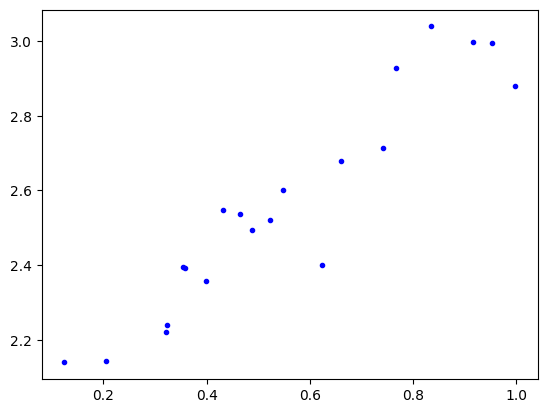

In [ ]:
# Visualize the training data
X_train, y_train = get_random_data(1, 2)
plt.plot(X_train, y_train, 'b.')

In [ ]:
linreg = LinearRegressor()
# Print the outputs and weights of the model before training
print(linreg(X_train))
print(linreg.weights)

tf.Tensor(
[0.00344062 0.00672359 0.01248189 0.00539164 0.0078175  0.01289483
 0.00879909 0.00822197 0.01404296 0.01110702 0.00542629 0.00596602
 0.00601424 0.00209003 0.00725194 0.0154074  0.01678346 0.0092185
 0.01601337 0.01050185], shape=(20,), dtype=float32)
[<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.01682344], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [ ]:
# Compute the loss of the model before training
loss = mean_square_error(linreg(X_train), y_train)
print(loss.numpy())

6.586628


In [ ]:
learning_rate = 0.05
steps = 50

# Train the model
for step in range(steps):
    # Use tf.GradientTape() to record the gradients
    with tf.GradientTape() as tape:
        # Compute the outputs of the model
        y_pred = linreg(X_train)
        # Compute the loss
        loss = mean_square_error(y_pred, y_train)
    # Compute the gradients of the loss with respect to the weights and bias
    gradients = tape.gradient(loss, linreg.trainable_variables)
    # Apply the gradient descent algorithm to update the weights and bias
    linreg.w.assign_sub(learning_rate * gradients[0])
    linreg.b.assign_sub(learning_rate * gradients[1])
    if step % 5 == 0:
        print(f'Step {step} - loss: {loss.numpy():.4f}.')

Step 0 - loss: 6.5866.
Step 5 - loss: 1.6081.
Step 10 - loss: 0.3978.
Step 15 - loss: 0.1036.
Step 20 - loss: 0.0321.
Step 25 - loss: 0.0147.
Step 30 - loss: 0.0105.
Step 35 - loss: 0.0094.
Step 40 - loss: 0.0092.
Step 45 - loss: 0.0091.


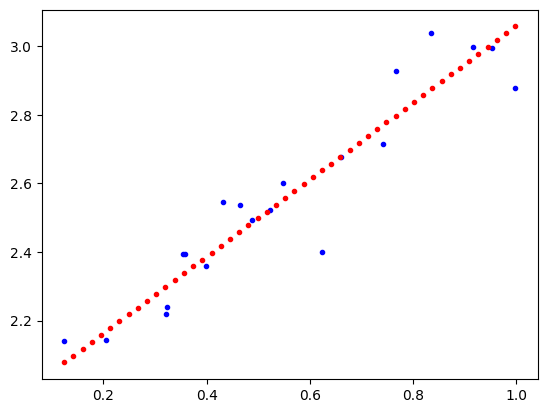

In [ ]:
X_linreg = np.linspace(min(X_train), max(X_train), 50)
# Visualize the training data and the fitted line
plt.plot(X_train, y_train, 'b.')
plt.plot(X_linreg, linreg.w * X_linreg + linreg.b, 'r.')

### Custom Training Loops
- [Reuters](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/reuters)

In [ ]:
# Import necessary modules
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Softmax
from tensorflow.keras.datasets import reuters
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.data import Dataset
from tensorflow.keras.metrics import Mean, CategoricalAccuracy

In [ ]:
# Load the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# Define the class names
class_names = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

print("Label: {}".format(class_names[train_labels[0]]))

2110848/2110848 [==============================] - 0s 0us/step
Label: earn


In [ ]:
# Copy the previous code to define our model
class MyLayer(Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal', name='kernel')
        self.b = self.add_weight(shape=(self.units, ),
                                 initializer='zeros', name='bias')

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

class MyDropout(Layer):
    def __init__(self, rate=0.5):
        super().__init__()
        self.rate = rate

    def call(self, inputs):
        return tf.nn.dropout(inputs, rate=self.rate)

class MyModel(Model):
    def __init__(self, units_1, units_2, units_3):
        super().__init__()
        self.layer_1 = MyLayer(units_1)
        self.dropout_1 = MyDropout()
        self.layer_2 = MyLayer(units_2)
        self.dropout_2 = MyDropout()
        self.layer_3 = MyLayer(units_3)
        self.softmax = Softmax()

    def call(self, inputs):
        x = self.layer_1(inputs)
        x = tf.nn.relu(x)
        x = self.dropout_1(x)
        x = self.layer_2(x)
        x = tf.nn.relu(x)
        x = self.dropout_2(x)
        x = self.layer_3(x)
        out = self.softmax(x)
        return out

In [ ]:
word_to_index = reuters.get_word_index()
invert_word_index = dict([(value, key) for (key, value) in word_to_index.items()])
text_news = ' '.join([invert_word_index.get(i - 3, '?') for i in train_data[0]])
print(text_news)

550378/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
# Apply the bag of words to the dataset
def bag_of_words(text_samples, elements=10000):
    output = np.zeros((len(text_samples), elements))
    for i, word in enumerate(text_samples):
        output[i, word] = 1.
    return output

X_train = bag_of_words(train_data)
X_test = bag_of_words(test_data)

print(X_train.shape)
print(X_test.shape)

(8982, 10000)
(2246, 10000)


In [ ]:
loss_object = SparseCategoricalCrossentropy()
 
# Define the loss function
def loss(model, x, y, wd):
    kernel_variables = []
    for l in model.layers:
        for w in l.weights:
            if 'kernel' in w.name:
                kernel_variables.append(w)
    wd_penalty = wd * tf.reduce_sum([tf.reduce_sum(tf.square(k)) for k in kernel_variables])
    y_ = model(x)
    return loss_object(y_true=y, y_pred=y_) + wd_penalty

@tf.function # Use the decorator to accelerate the training process
def grad(model, inputs, targets, wd):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, wd)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

optimizer = Adam(learning_rate=0.001)

In [ ]:
# Define the training and test sets
train_dataset = Dataset.from_tensor_slices((X_train, train_labels))
train_dataset = train_dataset.batch(32)
test_dataset = Dataset.from_tensor_slices((X_test, test_labels))
test_dataset = test_dataset.batch(32)

In [ ]:
model = MyModel(64, 64, 46)

# Record the training loss and accuracy
train_loss = []
train_acc = []

# Train the model
for epoch in range(10):
    epoch_loss_avg = Mean()
    epoch_acc = CategoricalAccuracy()
    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y, 0.005)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        epoch_loss_avg(loss_value)
        epoch_acc(to_categorical(y), model(x))

    epoch_loss_avg_result = epoch_loss_avg.result()
    epoch_acc_result = epoch_acc.result()
    train_loss.append(epoch_loss_avg_result)
    train_acc.append(epoch_acc_result)

    print(f'Epoch {epoch:03d} - Loss: {epoch_loss_avg_result:.3f}, Accuracy: {epoch_acc_result:.3%}.')

Epoch 000 - Loss: 3.331, Accuracy: 47.484%.
Epoch 001 - Loss: 1.904, Accuracy: 62.035%.
Epoch 002 - Loss: 1.811, Accuracy: 67.201%.
Epoch 003 - Loss: 1.764, Accuracy: 68.415%.
Epoch 004 - Loss: 1.737, Accuracy: 69.194%.
Epoch 005 - Loss: 1.728, Accuracy: 70.107%.
Epoch 006 - Loss: 1.721, Accuracy: 70.174%.
Epoch 007 - Loss: 1.715, Accuracy: 70.586%.
Epoch 008 - Loss: 1.703, Accuracy: 70.664%.
Epoch 009 - Loss: 1.682, Accuracy: 71.198%.


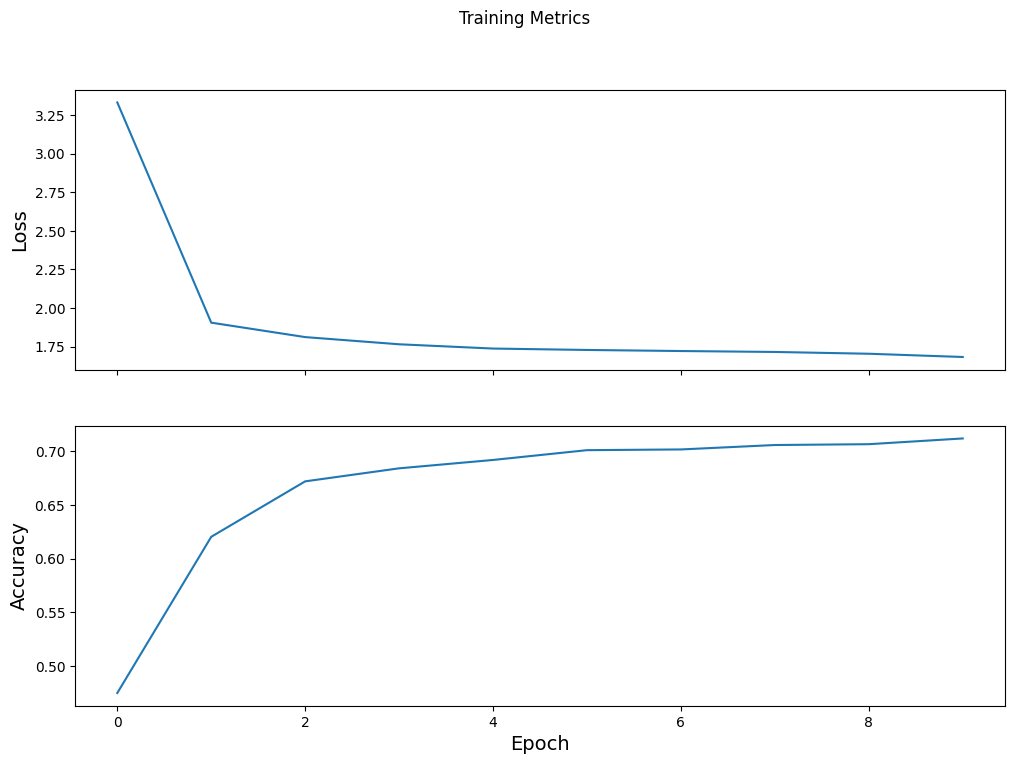

In [ ]:
# Visualize the training history
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_acc)
plt.show()

In [ ]:
# Evaluate the model on the test set
for x, y in test_dataset:
    loss_value = loss(model, x, y, 0.005)
    epoch_loss_avg(loss_value)
    epoch_acc(to_categorical(y), model(x))

print(f"Test loss: {epoch_loss_avg.result().numpy():.3f}.")
print(f"Test accuracy: {epoch_acc.result().numpy():.3%}.")

Test loss: 1.714.
Test accuracy: 70.618%.


In [ ]:
# Get the prediction of the model
predicted_label = np.argmax(model(X_train[np.newaxis,0]),axis=1)[0]
print(f"Predicted label: {class_names[predicted_label]}.")
print(f"True Label: {class_names[train_labels[0]]}.")

Predicted label: earn.
True Label: earn.
